In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('/Users/youziya/OneDrive - York University/MBAN 6100 DATA SCIENCE I/Assignment/kc_house_data.csv')

In [5]:
#1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

#You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
#Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.
#2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

#3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.drop('date',axis=1,inplace=True)

In [13]:
df.view.unique()

array([0, 3, 4, 2, 1])

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [2.83775344e-01 1.20752954e-01 9.37885301e-02 6.93162206e-02
 6.14652571e-02 5.03295519e-02 4.82552052e-02 4.60214680e-02
 4.14518714e-02 3.29958748e-02 3.00546723e-02 2.55779204e-02
 2.09966800e-02 1.65887660e-02 1.47085481e-02 1.32309776e-02
 1.18596362e-02 9.71089347e-03 9.11962795e-03 2.09670512e-32]
Cumulative explained variance ratio: [0.28377534 0.4045283  0.49831683 0.56763305 0.62909831 0.67942786
 0.72768306 0.77370453 0.8151564  0.84815228 0.87820695 0.90378487
 0.92478155 0.94137032 0.95607886 0.96930984 0.98116948 0.99088037
 1.         1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-2.791095,0.096259,-0.448135,0.622912,-0.021067,-0.120778,-0.385374,1.102852,0.208031,-0.280421,1.100403,-0.036615,-0.900637,0.125585,0.379698,-0.116376,0.590094,-0.010011,-0.053967,1.241393e-15
1,-0.118331,1.669037,-0.826439,1.818585,0.605633,4.105971,-1.405438,-0.008991,0.190074,0.421620,-1.038520,-0.010817,-0.400130,0.022701,-0.315651,0.145550,-0.429047,0.955355,0.333595,9.125484e-14
2,-2.746655,-0.378322,0.290319,0.305988,-0.125298,-0.416244,-1.648200,-0.862600,-1.254898,-0.544880,0.742369,0.008925,0.594630,0.093880,-1.163614,0.987659,-1.159128,-0.364842,0.071595,1.703284e-14
3,-1.018035,2.080815,0.470157,-1.724612,0.769268,-0.324990,1.549822,0.192407,0.933284,0.726452,-1.296792,-0.300962,-0.482228,0.475875,0.563935,-0.463232,-0.360930,-0.491851,0.186187,-5.895371e-15
4,-0.350405,-1.012805,-0.033179,0.224875,0.144229,-0.212552,0.034367,-0.911060,-1.261703,-0.070801,0.317605,0.104841,-0.578271,0.345232,0.753739,-0.416741,0.257085,-0.210145,-0.250035,-7.763373e-15


In [12]:
# Let's do the same, but now let's reduce to 2 components
# Perform PCA
pca = PCA(n_components = 0.90)
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.28377534 0.12075295 0.09378853 0.06931622 0.06146526 0.05032955
 0.04825521 0.04602147 0.04145187 0.03299587 0.03005467 0.02557792]
Cumulative explained variance ratio: [0.28377534 0.4045283  0.49831683 0.56763305 0.62909831 0.67942786
 0.72768306 0.77370453 0.8151564  0.84815228 0.87820695 0.90378487]


,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.791095,0.096259,-0.448135,0.622912,-0.021067,-0.120778,-0.385374,1.102852,0.208031,-0.280421,1.100403,-0.036615
1,-0.118331,1.669037,-0.826439,1.818585,0.605633,4.105971,-1.405438,-0.008991,0.190074,0.421620,-1.038520,-0.010817
2,-2.746655,-0.378322,0.290319,0.305988,-0.125298,-0.416244,-1.648200,-0.862600,-1.254898,-0.544880,0.742369,0.008925
3,-1.018035,2.080815,0.470157,-1.724612,0.769268,-0.324990,1.549822,0.192407,0.933284,0.726452,-1.296792,-0.300962
4,-0.350405,-1.012805,-0.033179,0.224875,0.144229,-0.212552,0.034367,-0.911060,-1.261703,-0.070801,0.317605,0.104841


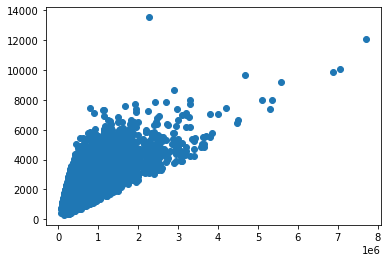

In [14]:
plt.scatter(df['price'],df['sqft_living'])

In [15]:
results = ols("price ~  yr_built + view + condition", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     1432.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:39:00   Log-Likelihood:            -3.0564e+05
No. Observations:               21613   AIC:                         6.113e+05
Df Residuals:                   21609   BIC:                         6.113e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.925e+06   1.69e+05    -11.366      0.0

In [17]:
pred_vals = results.predict(df[['yr_built','view','condition']])

In [18]:
pred_vals

0        464342.499477
1        459634.005919
2        438445.784906
3        534795.135394
4        502010.447944
             ...      
21608    527907.162516
21609    533792.779464
21610    527907.162516
21611    522021.545568
21612    526730.039126
Length: 21613, dtype: float64

In [ ]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:''}),df['casual']], axis=1)

In [ ]:
res

In [ ]:
res['error'] = res['y_hat'] - res['casual']

In [ ]:
res.head(1)

In [ ]:
res['sq_error'] = res['error']**2

In [ ]:
np.sqrt(res['sq_error'].mean())

In [ ]:
plt.hist(bikes['casual'])

In [ ]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)